![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [235]:
df = pd.read_excel('/Users/gabrielrojas/Documents/PROYECTOS/PROGRAMACIÓN/HENRY/DATA FT-20/M6/Proyecto_Integrador/Proyecto_Integrador_M6/Dataset/BBDD_Hospitalización.xlsx')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [236]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [237]:
df.dtypes

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [239]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)


In [240]:
# Luego de ver la tabla en data wrangler, observamos que las dos últimas filas no contienen datos --> eliminar
df = df.drop(df.index[-2:])

In [241]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [242]:
# 'ENF. CRONICA PULMONAR OBSTRUCTIVA' y  'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS' no pareceN ser variables relevantes a la hospitalización por cancer de próstata --> Eliminar
# 'DIAS HOSPITALIZACION MQ'y 'DIAS HOSPITALIZACIÓN UPC' parecen ser estados posteriores al target del modelo 'HOSPITALIZACION' --> Eliminar
df.drop(columns = ['ENF. CRONICA PULMONAR OBSTRUCTIVA','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'], inplace = True)
df


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,NO,4.00,NO,SI,12.0,NO,NEG,1,SI,NO,NO,NO,NO,SI
1,56.0,NO,NO,7.70,NO,SI,12.0,NO,NEG,1,SI,NO,NO,NO,NO,SI
2,57.0,NO,NO,29.00,SI,SI,24.0,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,NO,7.00,NO,SI,12.0,NO,NEG,1,SI,NO,NO,NO,NO,SI
4,55.0,NO,NO,29.00,SI,SI,24.0,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,12.0,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO
564,64.0,NO,NO,4.80,NO,SI,12.0,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO
565,69.0,NO,NO,4.43,NaN,NaN,20.0,NaN,NEG,NO,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.00,NO,SI,12.0,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [243]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [244]:
# En 'EDAD' hay dos celdas con valores sobre los 130 años, estos se reemplazan por la media
df.loc[df['EDAD'] > 100, 'EDAD'] = df['EDAD'].median()


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

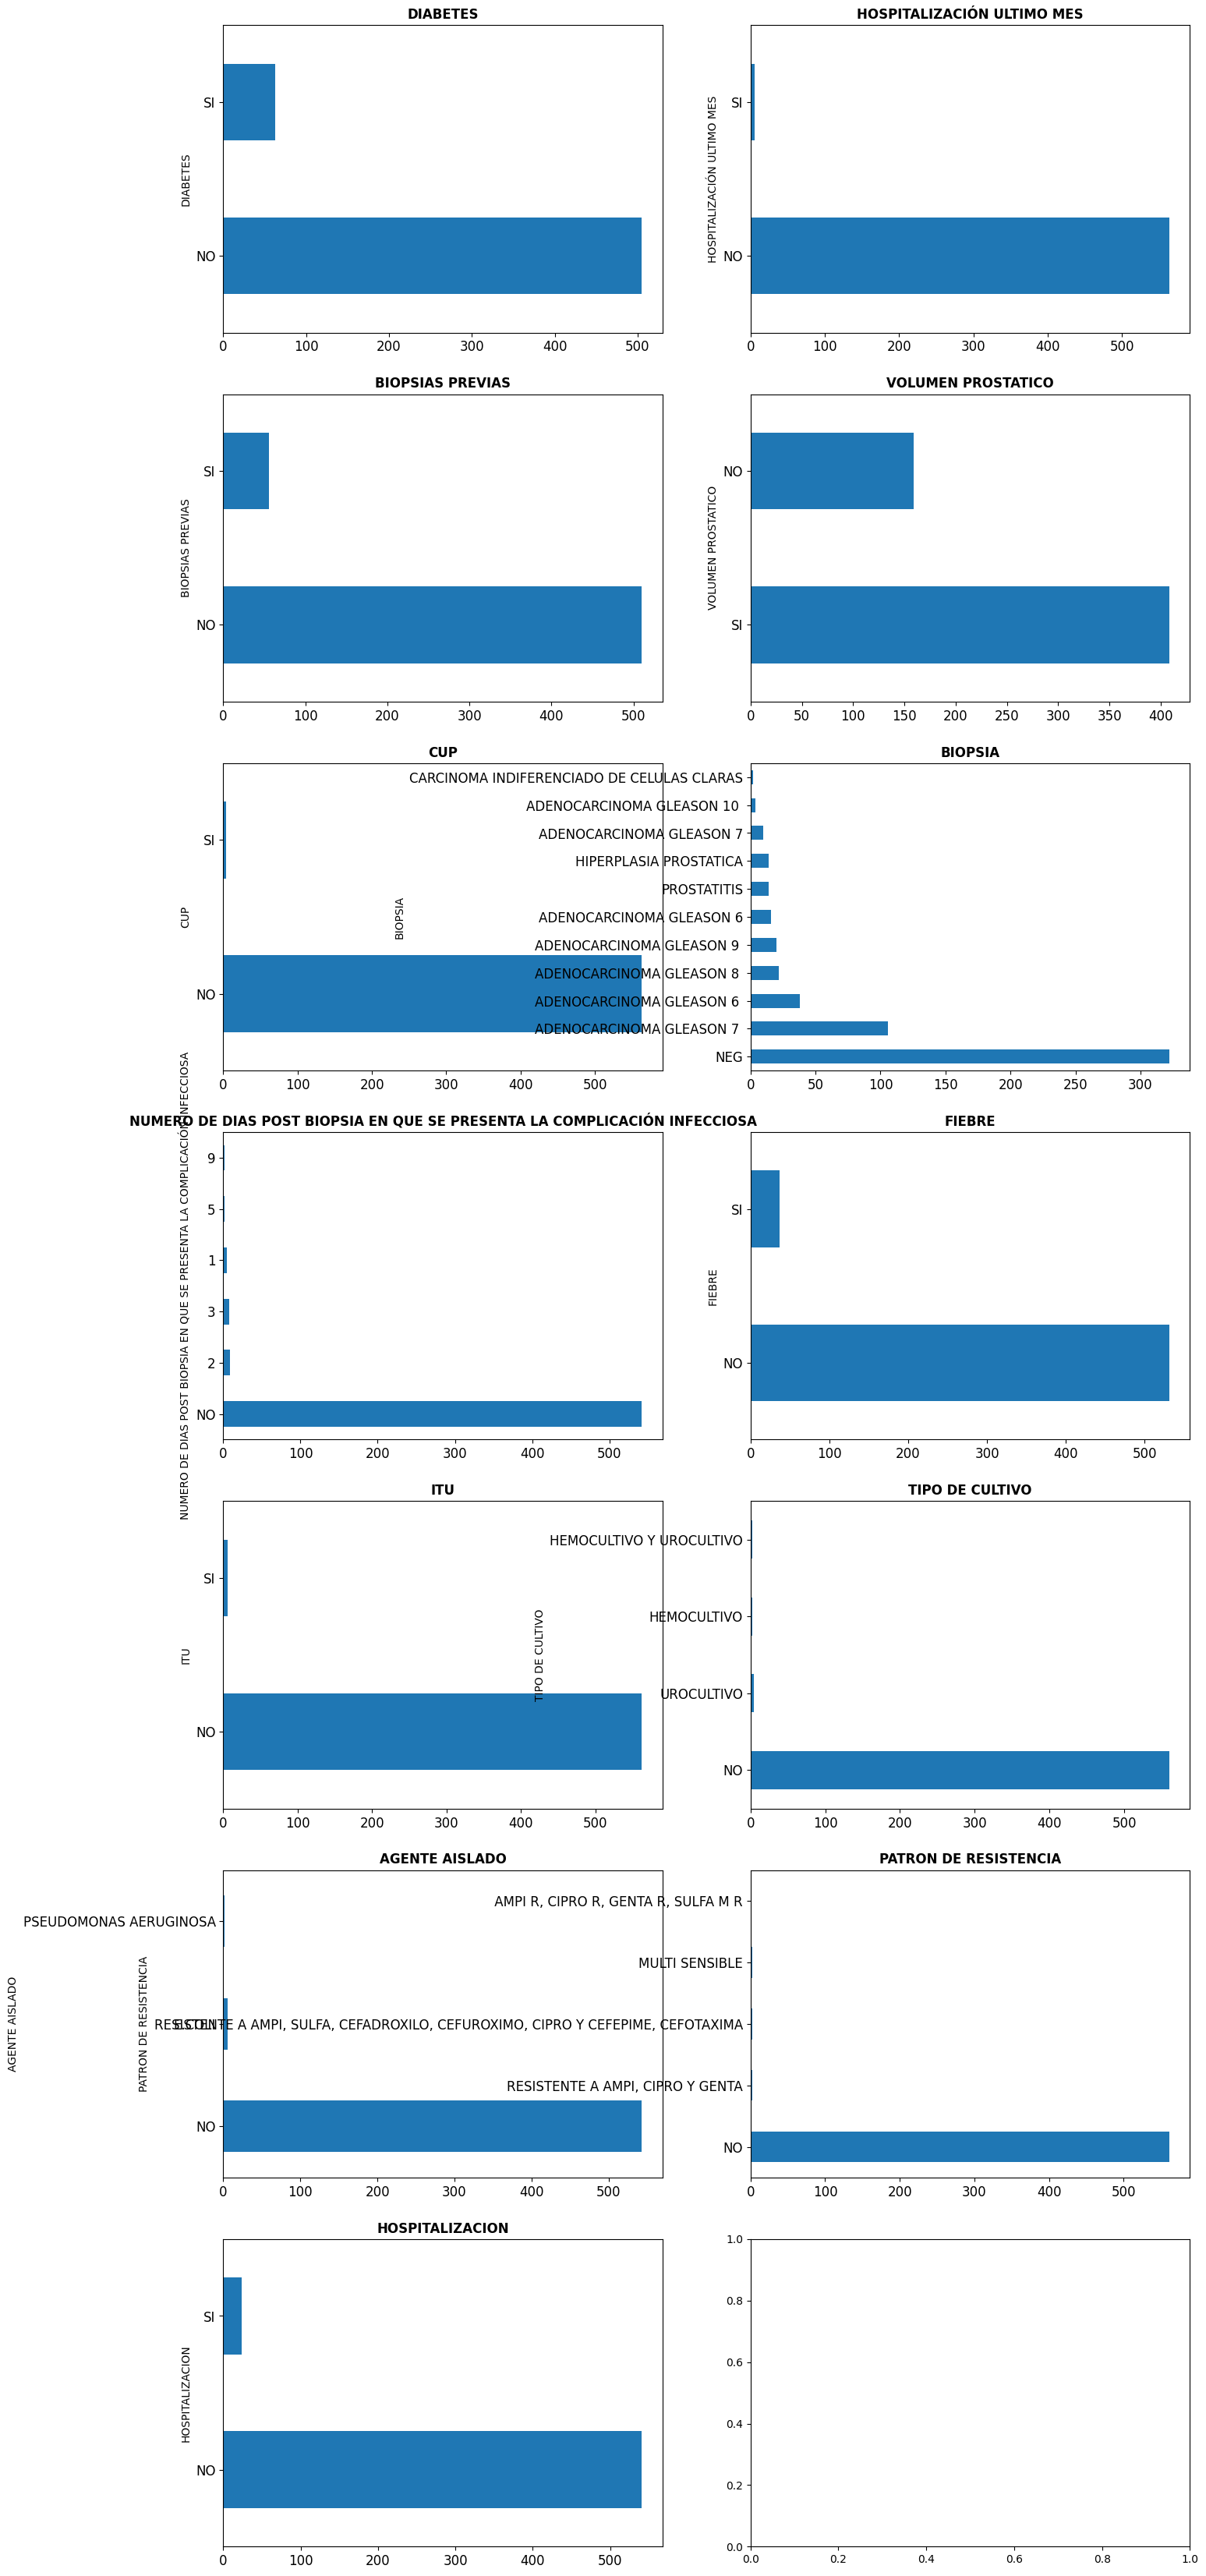

In [245]:
graficos_eda_categoricos(df.select_dtypes('O'))

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [246]:
# 'AGENTE AISLADO','HOSPITALIZACION','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP' -> imputar por valor más común

df = df.fillna({'BIOPSIAS PREVIAS': df['BIOPSIAS PREVIAS'].mode()[0], 
                'VOLUMEN PROSTATICO': df['VOLUMEN PROSTATICO'].mode()[0], 
                'CUP': df['CUP'].mode()[0], 
                'AGENTE AISLADO': df['AGENTE AISLADO'].mode()[0], 
                'HOSPITALIZACION': df['HOSPITALIZACION'].mode()[0]})

# 'PSA' -> imputar por media
df = df.fillna({'PSA': df['PSA'].mean()})


Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [247]:
# Es necesario normalizar y estandarizar la escala de las variables numéricas. Para ellos utilizaremos el método min/max. 
new_min, new_max = 0, 1
old_min, old_max = df['EDAD'].min(), df['EDAD'].max()
df['EDAD'] = (df['EDAD'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
old_min, old_max = df['PSA'].min(), df['PSA'].max()
df['PSA'] = (df['PSA'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
old_min, old_max = df['NUMERO DE MUESTRAS TOMADAS'].min(), df['NUMERO DE MUESTRAS TOMADAS'].max()
df['NUMERO DE MUESTRAS TOMADAS'] = (df['NUMERO DE MUESTRAS TOMADAS'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [248]:
df['HOSPITALIZACION'] = df['HOSPITALIZACION'].map({'NO':0, 'SI':1})
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].map({'NO':0, 'SI':1})
df['DIABETES'] = df['DIABETES'].map({'NO':0, 'SI':1})
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].map({'NO':0, 'SI':1})
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].map({'NO':0, 'SI':1})
df['CUP'] = df['CUP'].map({'NO':0, 'SI':1})
df['FIEBRE'] = df['FIEBRE'].map({'NO':0, 'SI':1})
df['ITU'] = df['ITU'].map({'NO':0, 'SI':1})

In [249]:
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 16 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    int64  
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    int64  
 5   VOLUMEN PROSTATICO                                                         568 non-null    int64  
 6   NUMERO DE MUESTRAS TOMADAS                                

In [250]:
cat_ohe = pd.get_dummies(cat, dtype=int)


In [251]:
cat_ohe.head()

,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,...,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_E.COLI,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [252]:
#Seleccionamos variables numéricas para juntarlas a las categóricas codificadas
num = df.select_dtypes('number').reset_index(drop = True)


In [253]:
#La unimos en el data frame 
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,...,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,FIEBRE,ITU,HOSPITALIZACION
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0.034205,0,1,0.4,0,1,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0.071429,0,1,0.4,0,1,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0.285714,1,1,1.0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0.064386,0,1,0.4,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0.285714,1,1,1.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0,1,0,0,0,0,0,0,0,0,...,0,0,0.054326,0,1,0.4,0,0,0,0
564,0,0,0,0,1,0,0,0,0,0,...,0,0,0.042254,0,1,0.4,0,0,0,0
565,0,0,0,0,0,0,0,0,0,1,...,0,0,0.038531,0,1,0.8,0,0,0,0
566,0,0,0,0,1,0,0,0,0,0,...,0,0,0.074447,0,1,0.4,0,0,0,0


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

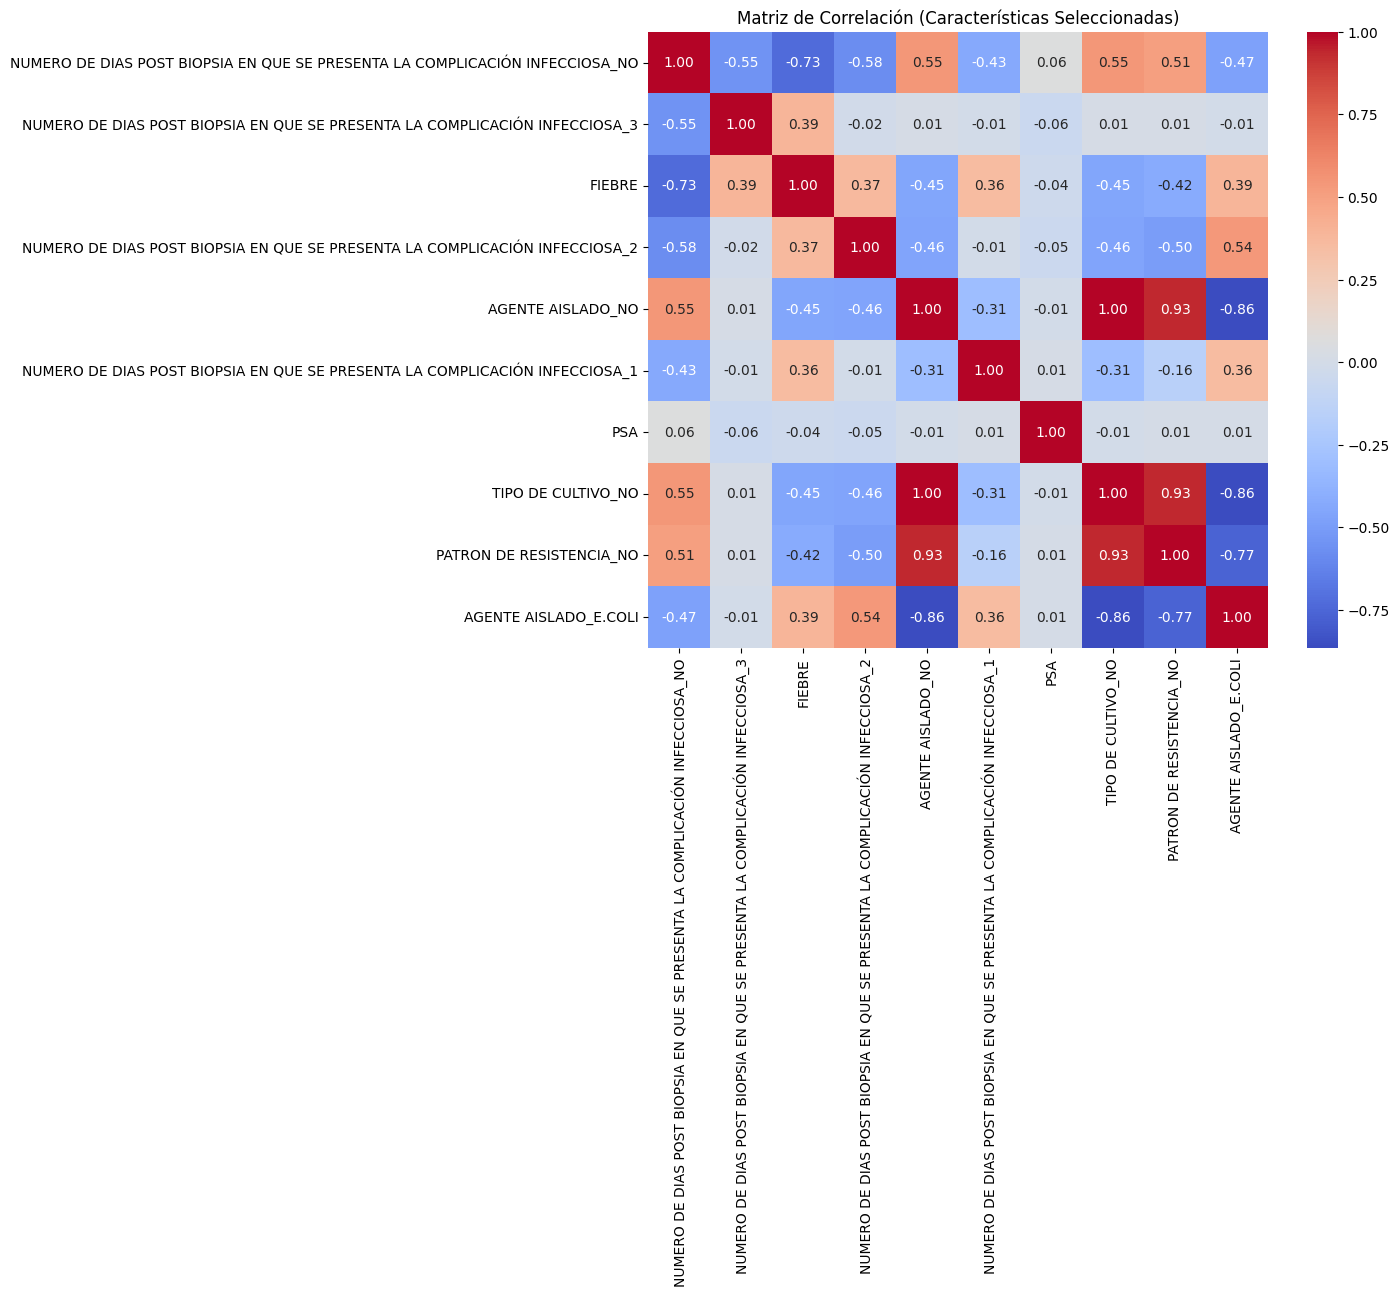

In [256]:
from sklearn.ensemble import RandomForestClassifier

# Separar las características y el objetivo
X = df_ml.drop('HOSPITALIZACION', axis=1)  # Debes reemplazar 'HOSPITALIZACION' con el nombre de tu columna objetivo
y = df_ml['HOSPITALIZACION']

# Crear un clasificador RandomForest
clf = RandomForestClassifier()

# Ajustar el clasificador al conjunto de datos
clf.fit(X, y)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar las características por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Seleccionar las características más importantes
top_features = feature_importance_df.head(10)['Feature'].tolist()  # Seleccionamos las 10 características más importantes como ejemplo

# Crear una nueva matriz de características con solo las características seleccionadas
X_selected = X[top_features]

# Calcular la matriz de correlación para las características seleccionadas
correlation_matrix_selected = X_selected.corr()

# Visualización de la matriz de correlación simplificada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación (Características Seleccionadas)")
plt.show()


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [255]:
df.to_csv('/Users/gabrielrojas/Documents/PROYECTOS/PROGRAMACIÓN/HENRY/DATA FT-20/M6/Proyecto_Integrador/Proyecto_Integrador_M6/Dataset/BBDD_Hospitalización.csv', index=False)